#Function approximation by NN
by Gabriel Turinici

Acknowledgement: this code is inpired in a large part from https://machinelearningmastery.com/neural-networks-are-function-approximators/

-48.12490162414159 48.863728464661975 -1.8459040936979858 0.9053362324600427
0.0 1.0 0.0 1.0
4/4 [==============================] - 0s 3ms/step
MSE: 0.006


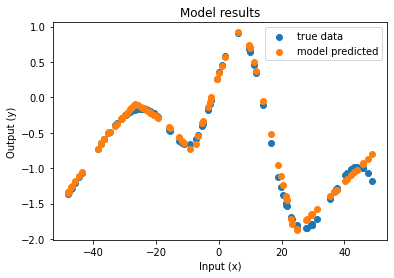

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from numpy import asarray
from matplotlib import pyplot as plt
from scipy import interpolate

# define the dataset
nx=100
x= np.sort(np.random.uniform(-50,50,nx))

#a general function: takes points from x, random as y and interpolates
xi = np.linspace(np.min(x),np.max(x),8,endpoint=True)

yi = np.random.randn(xi.shape[0])
#f = interpolate.interp1d(xi, yi,fill_value="extrapolate")
f = interpolate.InterpolatedUnivariateSpline(xi, yi)
y = f(x)
#need more epochs
max_epochs=1000


print(x.min(), x.max(), y.min(), y.max())
# make 2D arrays
x = x[:,None]
y = y[:,None]

# scale x and y
scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)
print(x.min(), x.max(), y.min(), y.max())
# architecture of the neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')
# fit the model on the training dataset
log=model.fit(x, y, epochs=max_epochs, batch_size=10, verbose=0)
# make predictions for the input data

yhat = model.predict(x)
# inverse transforms
x_plot = scale_x.inverse_transform(x)
y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)
# report model error
print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))
# plot x vs y
plt.scatter(x_plot,y_plot, label='true data')
# plot x vs yhat
plt.scatter(x_plot,yhat_plot, label='model predicted')
plt.title('Model results')
plt.xlabel('Input (x)')
plt.ylabel('Output (y)')
plt.legend()
plt.show()

dict_keys(['loss'])


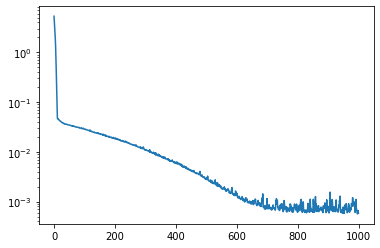

In [2]:
print(log.history.keys())
#plot loss convergence log
plt.semilogy(log.history['loss'])